In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import dirichlet
import attila_utils

In [2]:
group2condition_CO26990 = {
    'A': 'Saline WT',
    'B': 'Saline TG',
    'C': 'Amiloride TG',
}


fpath = '../../resources/QPS/5xFAD-mouse/CO26990-behavioral-data-cleaned.xlsx'
data_CO26990 = pd.read_excel(fpath, sheet_name='rawdata MWM day 5', index_col='IRN')
data_CO26990['Condition'] = data_CO26990.Group.apply(lambda x: group2condition_CO26990[x])
data_CO26990

,Cohort,Group,Sex,Target Zone Crossings,SE (%),NE (%),NW (%),SW (%),Condition
IRN,,,,,,,,,
12913 A,I,A,f,2,18.90810,60.31960,5.19308,15.57920,Saline WT
12915 A,I,A,f,2,25.56590,19.30760,28.09590,27.03060,Saline WT
12937 A,II,A,f,2,20.90550,50.19970,10.78560,18.10920,Saline WT
12955 A,II,A,f,1,20.10650,21.30490,33.28890,25.29960,Saline WT
12957 A,II,A,f,1,44.60720,16.24500,5.72570,33.42210,Saline WT
12961 A,II,A,f,5,11.85090,62.31690,9.45406,16.37820,Saline WT
12967 A,II,A,f,3,8.38881,37.01730,35.68580,18.90810,Saline WT
12979 A,II,A,f,4,15.57920,47.13720,30.49270,6.79095,Saline WT
14138,I,A,m,3,14.78030,44.20770,26.23170,14.78030,Saline WT


In [3]:
group2condition_CO28152 = {
    'A': 'Amiloride TG',
    'B': 'HCQ TG',
    'C': 'HCQ nano TG',
    'D': 'Saline TG',
    'E': 'R-HCQ TG',
    'F': 'S-HCQ TG',
    'G': 'TUDCA TG',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

fpath = '../../resources/QPS/5xFAD-mouse/CO28152-behavioral-data-cleaned.xlsx'
data_CO28152 = pd.read_excel(fpath, sheet_name='raw data MWM day 5', index_col='IRN')
data_CO28152['Condition'] = data_CO28152.Group.apply(lambda x: group2condition_CO28152[x])
data_CO28152

,Cohort,Group,Sex,Target Zone Crossings,SE (%),NE (%),NW (%),SW (%),Condition
IRN,,,,,,,,,
14627 A,I,A,f,1,0.00000,23.5686,63.11580,13.31560,Amiloride TG
14687 A,I,A,f,0,11.31820,24.2344,32.22370,32.22370,Amiloride TG
15117,I,A,f,0,28.76170,27.8296,18.37550,25.03330,Amiloride TG
15119,I,A,f,1,0.00000,15.0466,77.09720,7.85619,Amiloride TG
15121,I,A,f,7,2.26365,62.7164,11.71770,23.30230,Amiloride TG
...,...,...,...,...,...,...,...,...,...
16182,V,J,m,3,14.91340,61.9174,6.12517,16.77760,DMSO WT
16192,V,J,m,1,5.32623,21.4381,45.80560,27.43010,DMSO WT
16220,VI,J,m,4,18.10920,40.2130,16.24500,25.43280,DMSO WT


In [30]:
group2condition_CO28154 = {
    'A': 'Saline TG',
    #'B': 'Amiloride + HCQ TG', # absent from data
    'C': 'TUDCA + HCQ TG',
    'D': 'Arundine low dose TG',
    'E': 'Arundine mid dose TG',
    'F': 'Arundine high dose TG',
    'G': 'Vehicle (Arundine) TG',
    'H': 'Arundine high dose WT',
    #'I': 'Amiloride + HCQ WT', # absent from data
    'J': 'TUDCA + HCQ WT',
    'K': 'Saline WT',
    'L': 'Vehicle (Arundine) WT',
}

fpath = '../../resources/QPS/5xFAD-mouse/CO28154-behavioral-data-cleaned.xlsx'
data_CO28154 = pd.read_excel(fpath, sheet_name='Probe Trial day5', index_col='IRN')
data_CO28154['Condition'] = data_CO28154.Group.apply(lambda x: group2condition_CO28154[x])
data_CO28154

,Cohort,Group,Sex,Target Zone Crossings,SE (%),NE (%),NW (%),SW (%),Condition
IRN,,,,,,,,,
15721,II,A,f,1,36.61780,19.5739,25.8322,17.97600,Saline TG
15725,II,A,f,4,4.39414,53.6618,27.8296,14.11450,Saline TG
15891,V,A,f,1,28.09590,22.5033,16.2450,33.15580,Saline TG
15893,V,A,f,1,18.50870,28.6285,26.2317,26.63120,Saline TG
15911,V,A,f,4,20.23970,21.9707,33.4221,24.36750,Saline TG
...,...,...,...,...,...,...,...,...,...
16774,III,L,m,8,8.78828,60.0533,19.9734,11.18510,Vehicle (Arundine) WT
16784,III,L,m,2,22.37020,40.0799,17.7097,19.84020,Vehicle (Arundine) WT
16802,IV,L,m,3,16.91080,40.3462,26.7643,15.97870,Vehicle (Arundine) WT


In [4]:
def extract_data4dirichlet(group, data=data_CO26990):
    a = data.loc[data.Group == group, 'SE (%)':'SW (%)'].to_numpy()[:, [1, 2, 3, 0]]
    return(a)

def my_dirichlet_plot(group, do_test_uniform=True, data=data_CO26990, group2condition=group2condition_CO26990):
    a = extract_data4dirichlet(group, data=data)
    dirichlet.plot(a, label=group2condition[group], do_test_uniform=do_test_uniform, do_MWM_correction=True, verbose=True, save_figure='named-figure/dirichlet-plot-group-' + group + '.png')



Result of the Dirichlet uniformity test for group Saline WT:
# likelihood-ratio statistic (with MWM correction) = 14.3535
# p-value = 0.00246142
# MLE params under null hypothesis (uniformity)           :[2.02991233 2.02991233 2.02991233 2.02991233]
# MLE params under alternative hypothesis                 :[4.53177868 2.37172061 2.34260994 2.26527786]


/Users/jonesa7/tools/dirichlet.py:146: RuntimeWarning: divide by zero encountered in log
  logp = log(D).mean(axis=0)
/Users/jonesa7/tools/dirichlet.py:404: RuntimeWarning: invalid value encountered in scalar divide
  s1 = s0 * exp(-g/(s0*h + g)) # Newton on log s



Result of the Dirichlet uniformity test for group Amiloride TG:
# likelihood-ratio statistic (with MWM correction) = 3.68336
# p-value = 0.297748
# MLE params under null hypothesis (uniformity)           :[1.787041 1.787041 1.787041 1.787041]
# MLE params under alternative hypothesis                 :[2.61028068 1.93986022 1.89460516 1.56812866]


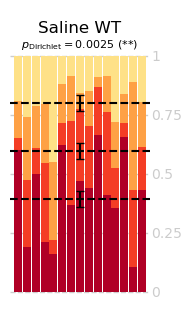

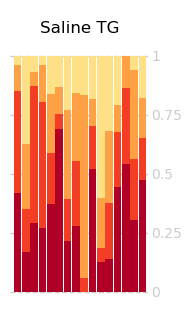

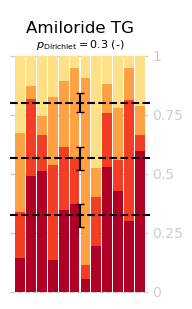

In [5]:
for group in data_CO26990.Group.unique():
    try:
        my_dirichlet_plot(group, do_test_uniform=True, data=data_CO26990, group2condition=group2condition_CO26990)
    except:
        my_dirichlet_plot(group, do_test_uniform=False, data=data_CO26990, group2condition=group2condition_CO26990)


Result of the Dirichlet uniformity test for group HCQ TG:
# likelihood-ratio statistic (with MWM correction) = 20.7962
# p-value = 0.000116048
# MLE params under null hypothesis (uniformity)           :[1.67579231 1.67579231 1.67579231 1.67579231]
# MLE params under alternative hypothesis                 :[4.60642225 2.2992132  2.09727267 1.8002952 ]

Result of the Dirichlet uniformity test for group Saline TG:
# likelihood-ratio statistic (with MWM correction) = 16.7034
# p-value = 0.000813275
# MLE params under null hypothesis (uniformity)           :[1.51908949 1.51908949 1.51908949 1.51908949]
# MLE params under alternative hypothesis                 :[3.21528712 2.66682178 1.7085947  1.32438375]

Result of the Dirichlet uniformity test for group R-HCQ TG:
# likelihood-ratio statistic (with MWM correction) = 9.33553
# p-value = 0.025147
# MLE params under null hypothesis (uniformity)           :[5.78204653 5.78204653 5.78204653 5.78204653]
# MLE params under alternative hypothesis

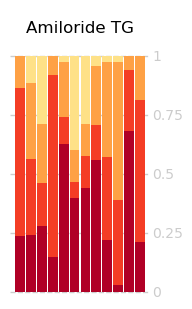

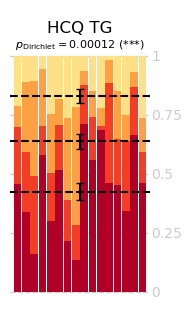

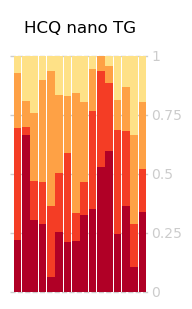

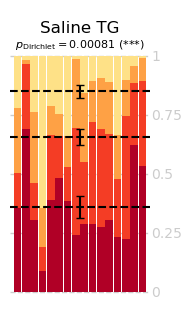

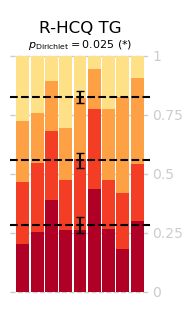

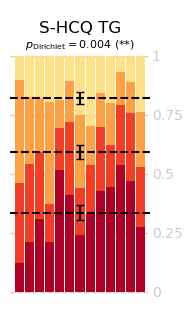

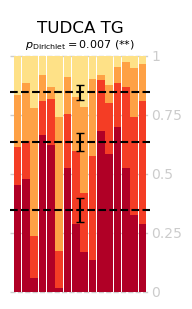

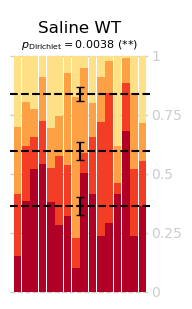

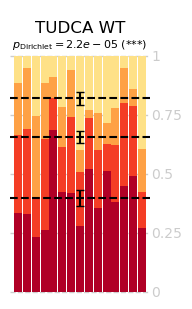

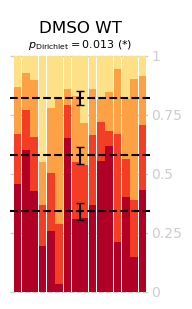

In [6]:
for group in data_CO28152.Group.unique():
    try:
        my_dirichlet_plot(group, do_test_uniform=True, data=data_CO28152, group2condition=group2condition_CO28152)
    except:
        my_dirichlet_plot(group, do_test_uniform=False, data=data_CO28152, group2condition=group2condition_CO28152)


Result of the Dirichlet uniformity test for group Saline TG:
# likelihood-ratio statistic (with MWM correction) = 19.3688
# p-value = 0.000229351
# MLE params under null hypothesis (uniformity)           :[2.58497094 2.58497094 2.58497094 2.58497094]
# MLE params under alternative hypothesis                 :[6.01469278 4.55933062 3.04333479 2.83542662]


/Users/jonesa7/tools/dirichlet.py:146: RuntimeWarning: divide by zero encountered in log
  logp = log(D).mean(axis=0)
/Users/jonesa7/tools/dirichlet.py:404: RuntimeWarning: invalid value encountered in scalar divide
  s1 = s0 * exp(-g/(s0*h + g)) # Newton on log s



Result of the Dirichlet uniformity test for group Arundine mid dose TG:
# likelihood-ratio statistic (with MWM correction) = 14.2283
# p-value = 0.00261033
# MLE params under null hypothesis (uniformity)           :[1.45062541 1.45062541 1.45062541 1.45062541]
# MLE params under alternative hypothesis                 :[3.01318267 2.10837275 1.71545089 1.21475007]

Result of the Dirichlet uniformity test for group Arundine high dose TG:
# likelihood-ratio statistic (with MWM correction) = 26.6849
# p-value = 6.85433e-06
# MLE params under null hypothesis (uniformity)           :[1.59577088 1.59577088 1.59577088 1.59577088]
# MLE params under alternative hypothesis                 :[4.43165426 3.39371719 2.52268343 1.38034283]

Result of the Dirichlet uniformity test for group Vehicle (Arundine) TG:
# likelihood-ratio statistic (with MWM correction) = 18.1314
# p-value = 0.000413241
# MLE params under null hypothesis (uniformity)           :[3.01981042 3.01981042 3.01981042 3.01981042]


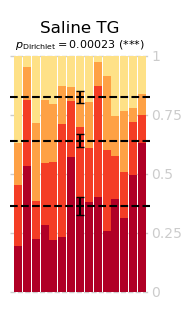

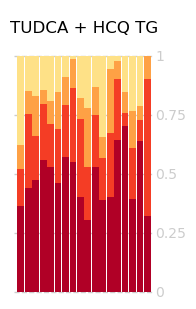

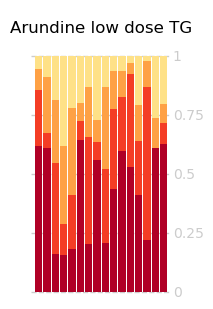

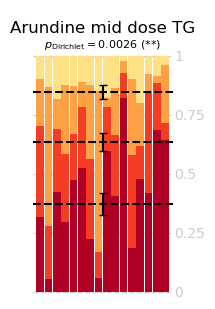

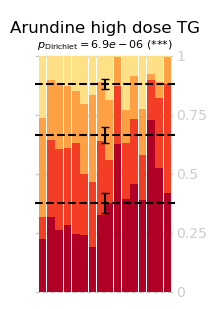

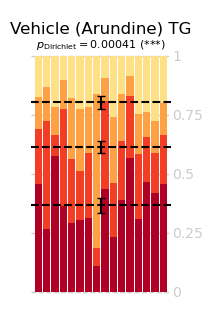

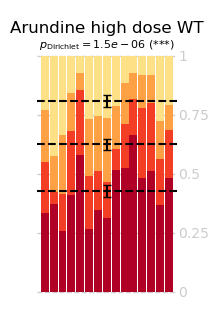

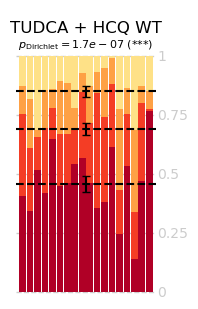

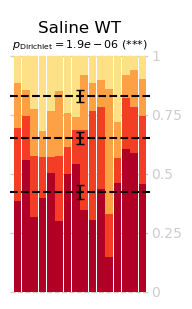

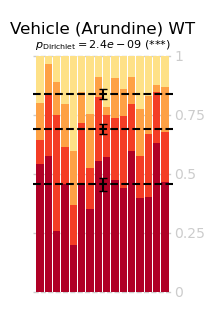

In [31]:
for group in data_CO28154.Group.unique():
    try:
        my_dirichlet_plot(group, do_test_uniform=True, data=data_CO28154, group2condition=group2condition_CO28154)
    except:
        my_dirichlet_plot(group, do_test_uniform=False, data=data_CO28154, group2condition=group2condition_CO28154)

In [7]:
%connect_info

{
  "shell_port": 50101,
  "iopub_port": 50102,
  "stdin_port": 50103,
  "control_port": 50105,
  "hb_port": 50104,
  "ip": "127.0.0.1",
  "key": "16d61718-d6d75856520c1df9dca50578",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-06-26-mwm-test-probe-CO28154/Untitled.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-288ea2d0-ad3b-4490-9b99-4b99b06aae35.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
